## Logistic regression for a binary classification with a regularization

<hr>

## Import library and load the data from the files

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# import data with numpy
data_train  = np.loadtxt('training.txt', delimiter=',')
data_test   = np.loadtxt('testing.txt', delimiter=',')

# number of training data
number_data_train   = data_train.shape[0] 
number_data_test    = data_test.shape[0]

# training data
x1_train            = data_train[:,0] # feature 1
x2_train            = data_train[:,1] # feature 2
idx_class0_train    = (data_train[:,2]==0) # index of class0
idx_class1_train    = (data_train[:,2]==1) # index of class1

# testing data
x1_test             = data_test[:,0] # feature 1
x2_test             = data_test[:,1] # feature 2
idx_class0_test     = (data_test[:,2]==0) # index of class0
idx_class1_test     = (data_test[:,2]==1) # index of class1

## Plot the training data

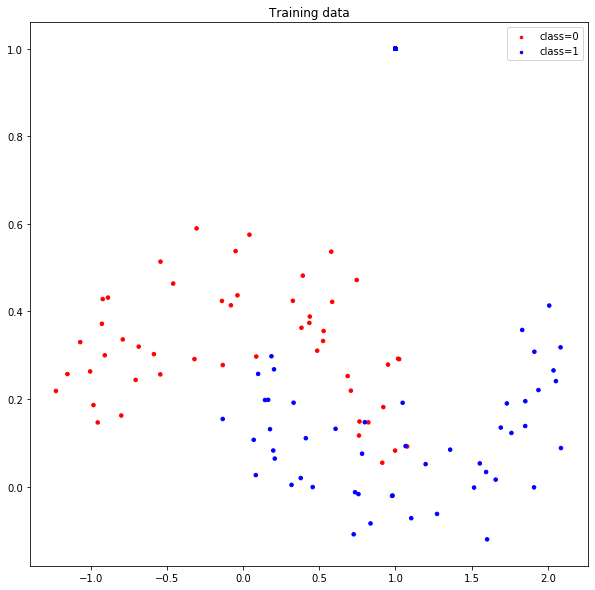

In [3]:
plt.figure(1,figsize=(10,10))
plt.scatter(x1_train, x2_train, s=idx_class0_train*50, c='r', marker='.', label='class=0') 
plt.scatter(x1_train, x2_train, s=idx_class1_train*50, c='b', marker='.', label='class=1')
plt.title('Training data')
plt.legend()
plt.show()

## Plot the testing data

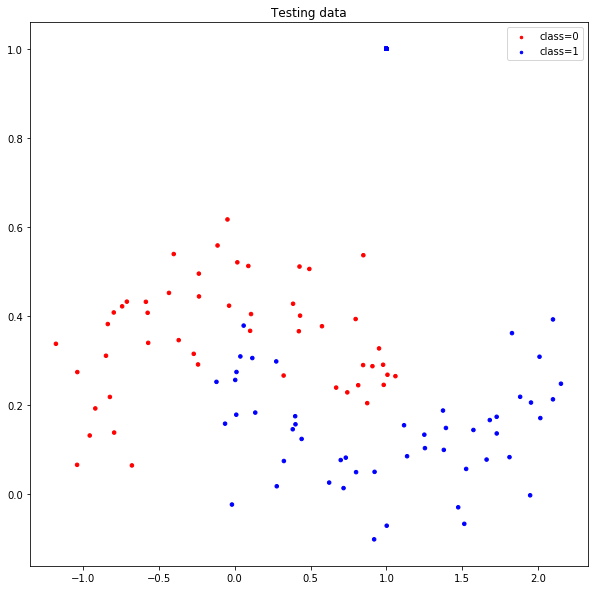

In [5]:
plt.figure(2,figsize=(10,10))
plt.scatter(x1_test, x2_test, s=idx_class0_test*50, c='r', marker='.', label='class=0') 
plt.scatter(x1_test, x2_test, s=idx_class1_test*50, c='b', marker='.', label='class=1')
plt.title('Testing data')
plt.legend()
plt.show()

## Define sigmoid function and predictive function

In [8]:
# sigmoid function
def sigmoid(z):
    sigmoid_f = 1 / (1 + np.exp(-z))
    return sigmoid_f 


# predictive function definition
def f_pred(X,w): 
    p = sigmoid(X@w)
    return p



In [ ]:
# construct the data matrix X, and label vector y
n = data.shape[0]
X = np.ones([n,100])

num = 0

for i in range(9):
    for j in range(9):
        X[:, num] = (x1**i)*(x2**j)
        
y = data[:,2][:,None] # label 

## [output]
<hr>

## 1. Plot the training data [0.5pt]
<hr>

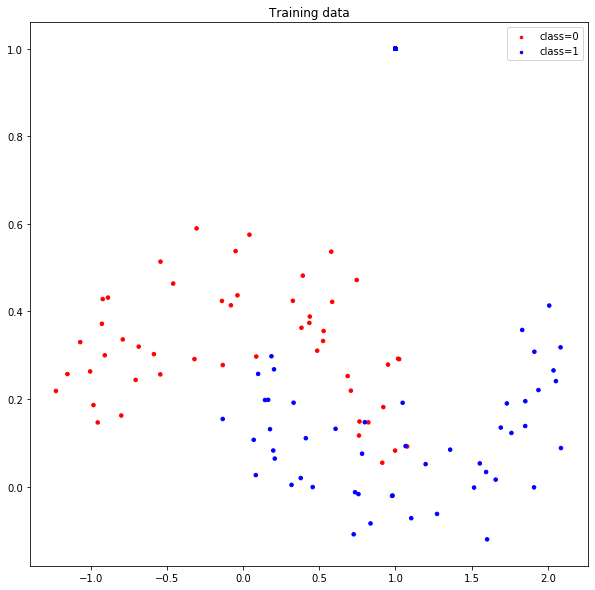

In [6]:
plt.figure(1,figsize=(10,10))
plt.scatter(x1_train, x2_train, s=idx_class0_train*50, c='r', marker='.', label='class=0') 
plt.scatter(x1_train, x2_train, s=idx_class1_train*50, c='b', marker='.', label='class=1')
plt.title('Training data')
plt.legend()
plt.show()

## 2. Plot the testing data [0.5pt]
<hr>

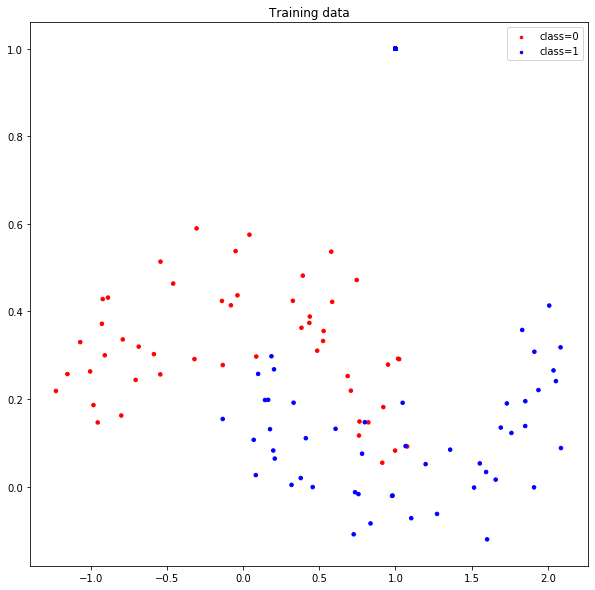

In [7]:
plt.figure(1,figsize=(10,10))
plt.scatter(x1_train, x2_train, s=idx_class0_train*50, c='r', marker='.', label='class=0') 
plt.scatter(x1_train, x2_train, s=idx_class1_train*50, c='b', marker='.', label='class=1')
plt.title('Training data')
plt.legend()
plt.show()

## 3. Plot the learning curve with λ=0.00001\lambda = 0.00001λ=0.00001 [1pt]
<hr>

## 4. Plot the learning curve with λ=0.0001\lambda = 0.0001λ=0.0001 [1pt]
<hr>

## 5. Plot the learning curve with λ=0.001\lambda = 0.001λ=0.001 [1pt]
<hr>

## 6. Plot the learning curve with λ=0.01\lambda = 0.01λ=0.01 [1pt]
<hr>

## 7. Plot the learning curve with λ=0.1\lambda = 0.1λ=0.1 [1pt]
<hr>

## 8. Plot the probability map of the obtained classifier with λ=0.00001\lambda = 0.00001λ=0.00001 [1pt]
<hr>

## 9. Plot the probability map of the obtained classifier with λ=0.0001\lambda = 0.0001λ=0.0001 [1pt]
<hr>

## 10. Plot the probability map of the obtained classifier with λ=0.001\lambda = 0.001λ=0.001 [1pt]
<hr>

## 11. Plot the probability map of the obtained classifier with λ=0.01\lambda = 0.01λ=0.01 [1pt]
<hr>

## 12. Plot the probability map of the obtained classifier with λ=0.1\lambda = 0.1λ=0.1 [1pt]
<hr>

## 13. Print the final training accuracy with the given regularization parameters [2.5pt]
<hr>

## 14. Print the final testing accuracy with the given regularization parameters [2.5pt]
<hr>